In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("sample_real_estate_data.csv")

In [4]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,0,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800.0


In [7]:
df.isnull().sum() 

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [8]:
missing_value= ['n/a','na','--']
df=pd.read_csv("sample_real_estate_data.csv",na_values=missing_value)

In [9]:
df.isnull().sum() 

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           1
dtype: int64

In [10]:
#unexpected missing value 
count=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[count,'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    count+=1

In [11]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [12]:
from sklearn.impute import SimpleImputer 



In [13]:

X = df.iloc[:,:-1].values
Y = df.iloc[:,6]
X

array([[100001000.0, 104.0, 'PUTNAM', 'Y', 3.0, '1'],
       [100002000.0, 197.0, 'LEXINGTON', 'N', 3.0, '0'],
       [100003000.0, nan, 'LEXINGTON', 'N', nan, '1'],
       [100004000.0, 201.0, 'BERKELEY', nan, 1.0, nan],
       [nan, 203.0, 'BERKELEY', 'Y', 3.0, '2'],
       [100006000.0, 207.0, 'BERKELEY', 'Y', nan, '1'],
       [100007000.0, nan, 'WASHINGTON', nan, 2.0, 'HURLEY'],
       [100008000.0, 213.0, 'TREMONT', 'Y', 1.0, '1'],
       [100009000.0, 215.0, 'TREMONT', 'Y', nan, '2']], dtype=object)

In [21]:
Y

0    1000.0
1     100.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7       NaN
8    1800.0
Name: SQ_FT, dtype: float64

In [17]:
imput =  imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imput = imput.fit(X[:,1:2])     
X[:,1:2] = imput.transform(X[:,1:2])
X[:,1:2]

array([[104.0],
       [197.0],
       [191.42857142857142],
       [201.0],
       [203.0],
       [207.0],
       [191.42857142857142],
       [213.0],
       [215.0]], dtype=object)

In [22]:
median = df['NUM_BEDROOMS'].median()
median
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,0,100.0
2,100003000.0,NaN,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


In [23]:
mean_no = df['ST_NUM'].mean()
df['ST_NUM'].fillna(mean_no, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,0,100.0
2,100003000.0,191.428571,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.000000,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.000000,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.000000,BERKELEY,Y,2.5,1,800.0
6,100007000.0,191.428571,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.000000,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.000000,TREMONT,Y,2.5,2,1800.0


In [26]:
df=pd.read_csv('MallCustomers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,4].values

In [28]:
from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
X[:,1] = lblencode.fit_transform(X[:,1])
X

array([[1, 1, 19, 15],
       [2, 1, 21, 15],
       [3, 0, 20, 16],
       [4, 0, 23, 16],
       [5, 0, 31, 17],
       [6, 0, 22, 17],
       [7, 0, 35, 18],
       [8, 0, 23, 18],
       [9, 1, 64, 19],
       [10, 0, 30, 19],
       [11, 1, 67, 19],
       [12, 0, 35, 19],
       [13, 0, 58, 20],
       [14, 0, 24, 20],
       [15, 1, 37, 20],
       [16, 1, 22, 20],
       [17, 0, 35, 21],
       [18, 1, 20, 21],
       [19, 1, 52, 23],
       [20, 0, 35, 23],
       [21, 1, 35, 24],
       [22, 1, 25, 24],
       [23, 0, 46, 25],
       [24, 1, 31, 25],
       [25, 0, 54, 28],
       [26, 1, 29, 28],
       [27, 0, 45, 28],
       [28, 1, 35, 28],
       [29, 0, 40, 29],
       [30, 0, 23, 29],
       [31, 1, 60, 30],
       [32, 0, 21, 30],
       [33, 1, 53, 33],
       [34, 1, 18, 33],
       [35, 0, 49, 33],
       [36, 0, 21, 33],
       [37, 0, 42, 34],
       [38, 0, 30, 34],
       [39, 0, 36, 37],
       [40, 0, 20, 37],
       [41, 0, 65, 38],
       [42, 1, 24, 38],
 

In [29]:
from sklearn.preprocessing import OneHotEncoder
onehotencod = OneHotEncoder()
X = onehotencod.fit_transform(X).toarray()
X


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
df=pd.read_csv('diabetes.csv')

In [36]:
df['Pregnancies']=df['Pregnancies'].astype('float')
df=df.drop(df['Pregnancies'])

X = df.iloc[:,:-1].values 
y = df.iloc[:,8].values
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
16,0.0,118,84,47,230,45.8,0.551,31,1,NaN,NaN,NaN,NaN
18,1.0,103,30,38,83,43.3,0.183,33,0,NaN,NaN,NaN,NaN
19,1.0,115,70,30,96,34.6,0.529,32,1,NaN,NaN,NaN,NaN
20,3.0,126,88,41,235,39.3,0.704,27,0,NaN,NaN,NaN,NaN
21,8.0,99,84,0,0,35.4,0.388,50,0,NaN,NaN,NaN,NaN


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
X_train

array([[1.0, 101, 50, ..., nan, nan, nan],
       [0.0, 139, 62, ..., nan, nan, nan],
       [1.0, 79, 60, ..., nan, nan, nan],
       ...,
       [5.0, 0, 80, ..., nan, nan, nan],
       [2.0, 90, 68, ..., nan, nan, nan],
       [1.0, 82, 64, ..., nan, nan, nan]], dtype=object)

In [39]:
X_test

array([[1.0, 103, 80, ..., nan, nan, nan],
       [5.0, 121, 72, ..., nan, nan, nan],
       [0.0, 113, 80, ..., nan, nan, nan],
       ...,
       [2.0, 120, 76, ..., nan, nan, nan],
       [1.0, 115, 70, ..., nan, nan, nan],
       [4.0, 144, 82, ..., nan, nan, nan]], dtype=object)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of data 
data = [1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
df.head()

,Positive Skewed
0,1
1,1
2,10
3,10
4,15


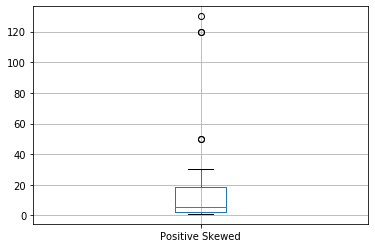

In [41]:
#Boxplot showing three outliers
df.boxplot(column='Positive Skewed')
plt.show()

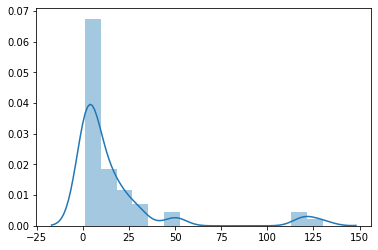

In [42]:
#Right Skewed data
sns.distplot(df)

In [43]:
#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 1 to 130
inp_array = df 
print ("Input array : ", inp_array)

Input array :      Positive Skewed
0                 1
1                 1
2                10
3                10
4                15
5                15
6                20
7                20
8                30
9                50
10              120
11              130
12              120
13               50
14               30
15               30
16               25
17               20
18               20
19               15
20               15
21               13
22               11
23                9
24                7
25                6
26                6
27                5
28                5
29                5
30                4
31                4
32                4
33                4
34                3
35                3
36                3
37                3
38                2
39                2
40                2
41                2
42                2
43                1
44                1
45                1
46                1
47                1
48   

In [44]:

#Applying log10 transformation with output values ranging from 0 to 2+
out_array = np.log10(inp_array) 
print ("Output array : ", out_array)

Output array :      Positive Skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          1.176091
5          1.176091
6          1.301030
7          1.301030
8          1.477121
9          1.698970
10         2.079181
11         2.113943
12         2.079181
13         1.698970
14         1.477121
15         1.477121
16         1.397940
17         1.301030
18         1.301030
19         1.176091
20         1.176091
21         1.113943
22         1.041393
23         0.954243
24         0.845098
25         0.778151
26         0.778151
27         0.698970
28         0.698970
29         0.698970
30         0.602060
31         0.602060
32         0.602060
33         0.602060
34         0.477121
35         0.477121
36         0.477121
37         0.477121
38         0.301030
39         0.301030
40         0.301030
41         0.301030
42         0.301030
43         0.000000
44         0.000000
45         0.000000
46         0.000000
47         0.000000
48  

In [45]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
capital=lambda x:x.upper()

df['Species'].apply(capital)

0         IRIS-SETOSA
1         IRIS-SETOSA
2         IRIS-SETOSA
3         IRIS-SETOSA
4         IRIS-SETOSA
            ...      
145    IRIS-VIRGINICA
146    IRIS-VIRGINICA
147    IRIS-VIRGINICA
148    IRIS-VIRGINICA
149    IRIS-VIRGINICA
Name: Species, Length: 150, dtype: object

In [ ]:
def changetoupprt()

In [49]:
#map  function 
df['Species'].map(capital)

0         IRIS-SETOSA
1         IRIS-SETOSA
2         IRIS-SETOSA
3         IRIS-SETOSA
4         IRIS-SETOSA
            ...      
145    IRIS-VIRGINICA
146    IRIS-VIRGINICA
147    IRIS-VIRGINICA
148    IRIS-VIRGINICA
149    IRIS-VIRGINICA
Name: Species, Length: 150, dtype: object

In [54]:
#ApplyMap function usage on Built-In function (sqrt, square)
df['SepalLengthCm'].apply(np.sqrt)

0      2.258318
1      2.213594
2      2.167948
3      2.144761
4      2.236068
         ...   
145    2.588436
146    2.509980
147    2.549510
148    2.489980
149    2.428992
Name: SepalLengthCm, Length: 150, dtype: float64